In [1]:
#| code-fold: true
# pip install git+https://github.com/AltamarMx/iertools.git

In [2]:
#| echo: true
import pandas as pd
from iertools.read import read_epw
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calplot
import matplotlib.ticker as ticker
from windrose import WindroseAxes

plt.style.use('../notebooks/enerdata_rectangle.mplstyle')

In [3]:
f = "../epw/Temixco_2018CST.epw"
tmx = read_epw(f,alias=True)


In [4]:
promedio = tmx.To.resample("YE").mean().mean()

# Analisis de clima en Temixco, Morelos, México

## Temperatura ambiente horaria

La temperatura en Temixco puede ir de alrededor los 10 $^oC$ a los 35 $^oC$ durante todo el año, como se ve en la @fig-to-anual. La temperatura anual promedio en Temixco es `{python} promedio.round(1)`.

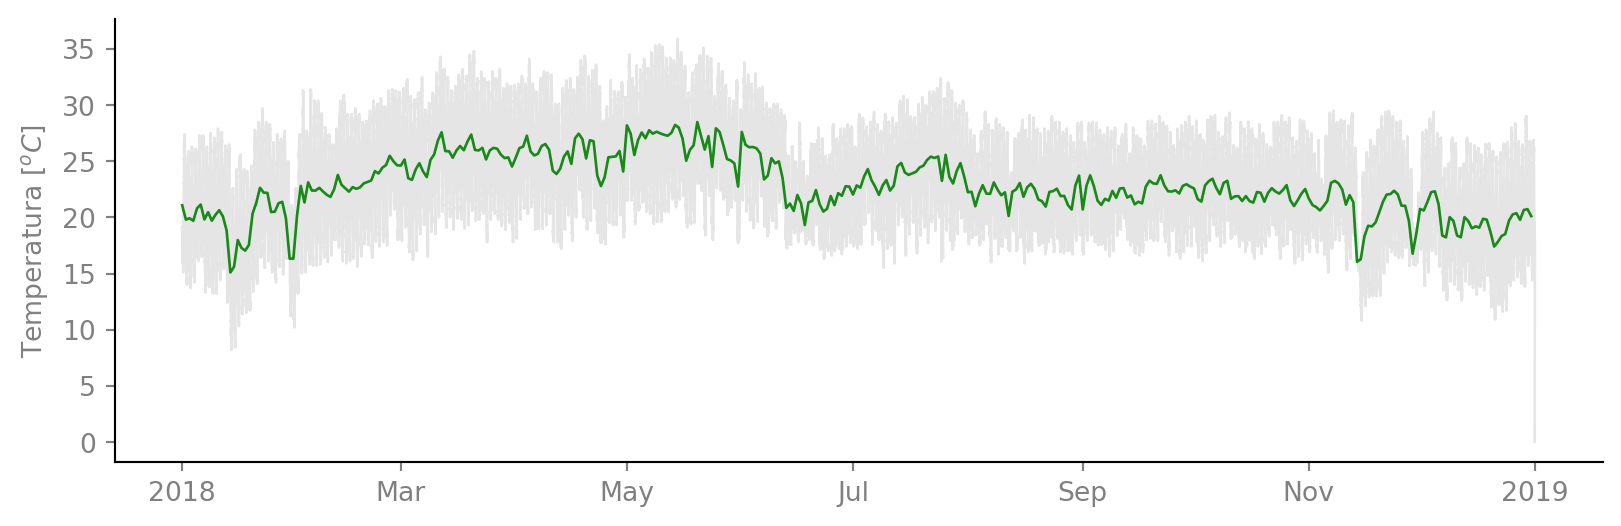

In [5]:
#| label: fig-to-anual
#| fig-cap: Temperatura ambiente en Temixco, Morelos

fig, ax = plt.subplots(figsize=(10,3))

ax.plot(tmx.To,"k-",alpha=0.1)
ax.plot(tmx.To.resample("D").mean(),"g-",alpha=0.9)

ax.set_ylabel("Temperatura [$^oC$]")
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

## Temperaturas máximas diarias y energía solar diaria

Las máximas temperaturas se presentan entre los meses de abril y mayo, como se puede ver en la @fig-to-max. Es en julio y agosto cuando se tiene la mayor radiación solar en el año, como se ve en la @fig-ig.

findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


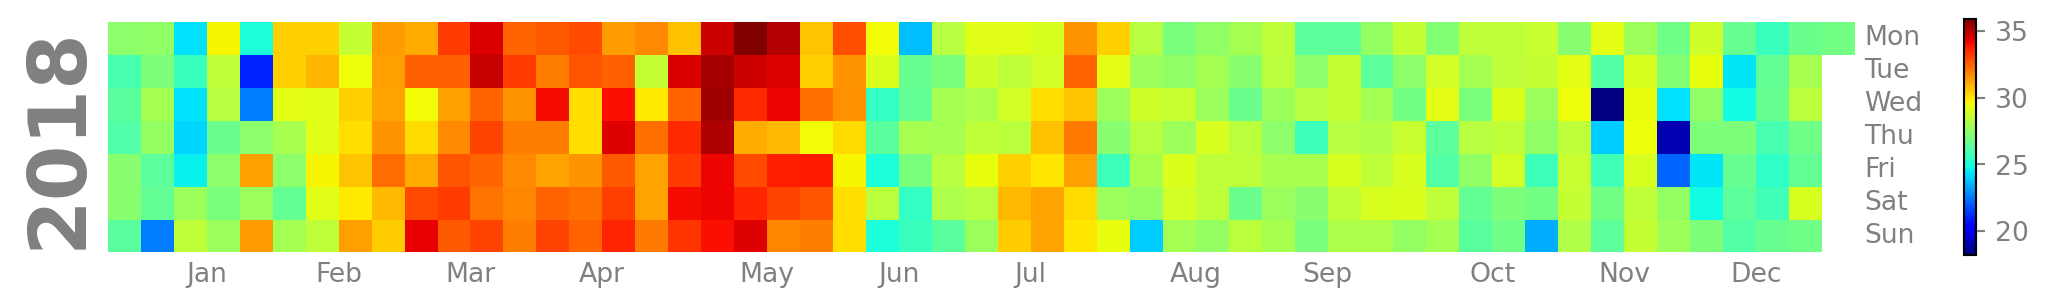

In [6]:
#| label: fig-to-max
#| fig-cap: Temperaturas máximas diarias en Temixco, Morelos

calplot.calplot(tmx.To.resample('D').max(),
                linewidth=0,
                cmap='jet',
                colorbar=None);

findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


findfont: Font family 'Helvetica' not found.


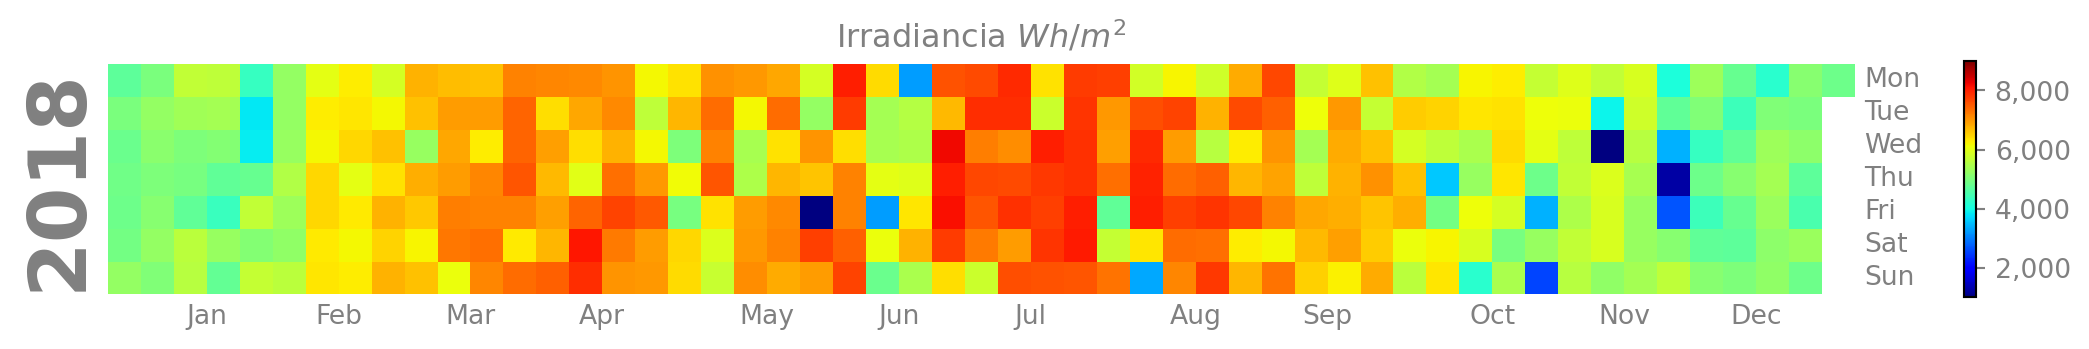

In [7]:
#| label: fig-ig
#| fig-cap: Energía solar diaria ($Wh/m^2$) en Temixco, Morelos
#| echo: true
#| code-fold: true

cal, cax =calplot.calplot(tmx.Ig.resample('D').sum()*1/6,
                          linewidth=0,
                          cmap='jet',colorbar=None,
                          vmin=1000,
                          vmax=9000);

cal.axes[0].set_title('Irradiancia $Wh/m^2$');

def format_func(x, pos):
    return f'{x:,.0f}'  # Añade separadores de miles, sin decimales

# Usa FuncFormatter con la función de formato definida anteriormente
formatter = ticker.FuncFormatter(format_func)

# Aplica el formatter al colorbar
cax = plt.gcf().axes[-1]  # Asumiendo que el colorbar es el último eje añadido
cax.yaxis.set_major_formatter(formatter)

## Rosa de vientos para Temixco, Morelos

La estación meteorológica se encuentra ubicada en el Instituto de Energías Renovables de la UNAM, y la orografía de ese sitio causa que la dirección dominante del viento cambie durante el día y la noche. En el día los vientos dominantes tienen una dirección de Sur a Norte como se ve en la @fig-windrose-1 y de Norte a Sur, como se ve en la @fig-windrose-2.

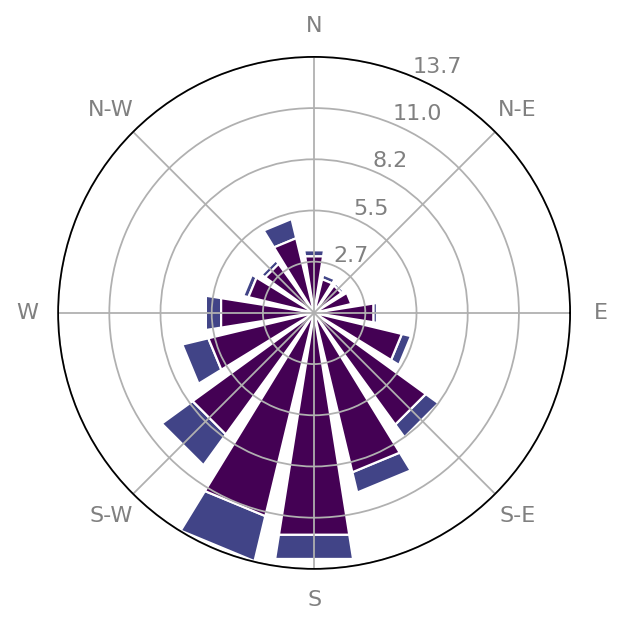

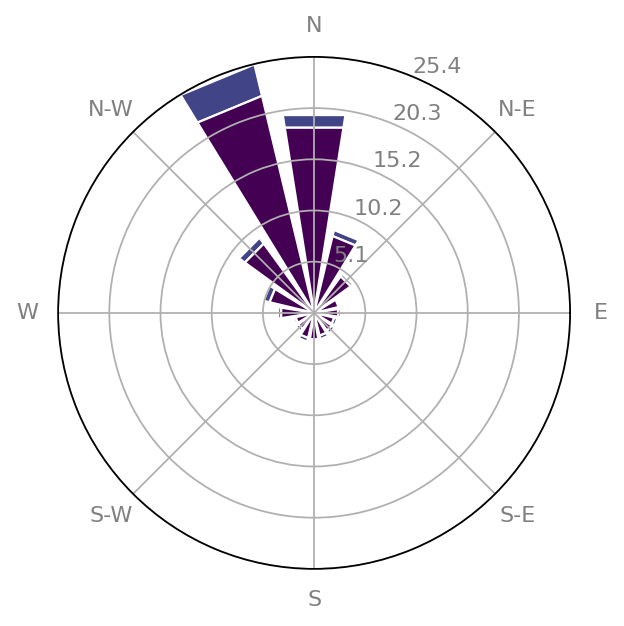

In [8]:
#| label: fig-windrose
#| fig-cap: "Dirección y magnitud del viento para Temixco, Morelos." 
#| fig-subcap:
#|   - "Día"
#|   - "Noche" 
#| layout-ncol: 2

dia = tmx.between_time("08:00:00","20:00:00")
ax = WindroseAxes.from_ax(figsize=(4,4))
ax.bar(dia.Wd, dia.Ws, normed=True, 
       opening=0.8, 
       edgecolor="white",bins=6)

noche = tmx.between_time("20:00:00","08:00:00")
ax = WindroseAxes.from_ax(figsize=(4,4))
ax.bar(noche.Wd, noche.Ws, normed=True, 
       opening=0.8, 
       edgecolor="white",bins=6)